This lab will demonstrate how to build models with the Functional syntax. You'll build one using the Sequential API and see how you can do the same with the Functional API. Both will arrive at the same architecture and you can train and evaluate it as usual.

In [1]:
import tensorflow as tf
from tensorflow.python.keras.utils.vis_utils import plot_model
from tensorflow.keras.models import Model


# <b> Sequential API

In [2]:
def build_model_with_sequential():
  return tf.keras.Sequential([ tf.keras.layers.Flatten(input_shape=(28, 28)),
                              tf.keras.layers.Dense(128, activation='relu'),
                              tf.keras.layers.Dense(10, activation='softmax')
                              
  ])

# <b> Functional API

In [5]:
def build_model_with_functional():
  input_layer = tf.keras.layers.Input(shape=(28, 28))

  flatten_layer = tf.keras.layers.Flatten()(input_layer)
  dense_layer = tf.keras.layers.Dense(128, activation='relu')(flatten_layer)
  output_layer = tf.keras.layers.Dense(10, activation='softmax')(dense_layer)

  model = Model(inputs=input_layer, outputs=output_layer)

  return model

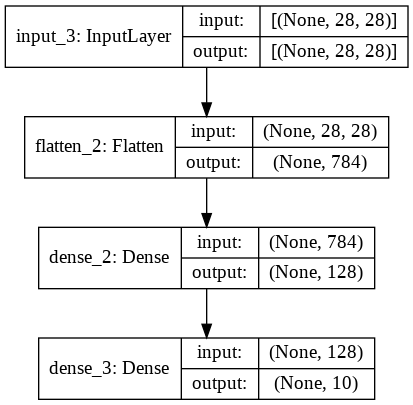

In [7]:
model = build_model_with_functional()
plot_model(model, show_shapes=True, show_layer_names=True, to_file='model.png')

In [10]:
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images = training_images / 255.0
test_images = test_images / 255.0

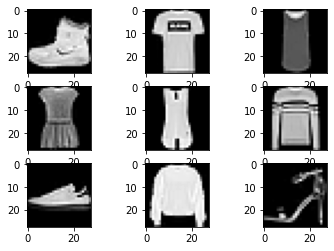

In [15]:
import matplotlib.pyplot as plt
for i in range(9):
	plt.subplot(3, 3, i+1)
	plt.imshow(training_images[i], cmap=plt.get_cmap('gray'))
plt.show()

In [16]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6344 - accuracy: 0.7808
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3804 - accuracy: 0.8631
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3399 - accuracy: 0.8736
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3103 - accuracy: 0.8878
Epoch 5/5
313/313 [==============================] - 0s 1ms/step - loss: 0.3626 - accuracy: 0.8700


[0.3625827431678772, 0.8700000047683716]